# SABench tutorial

This tutorial is designed to enable developers to quickly compare the results of their own methods with those of other methods. By running it, various evaluation metrics used in our paper will be automatically calculated for your aligned results, and visualizations will be generated. Here we use DLPFC data as example.

In [16]:
import sys
sys.path.append('Tutorial/')
import SABench

import os
import re
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Your Alignment Results

Please load the slices aligned using your method in sequential order to form a list. You can refer to the code below.

In [ ]:
def load_results(data_dir,pattern):
    slices = []
    files = []
    for filename in os.listdir(data_dir):
        if pattern in filename :
            files.append(filename)
    files.sort(key=lambda x: int(re.search(r'(\d+)\.h5ad$', x).group(1)))
    for filename in files:
        file_path = os.path.join(data_dir, filename)
        adata = sc.read_h5ad(file_path)
        slices.append(adata)

    return slices

DLPFC_results=load_results('Tutorial/Data_DLPFC','.h5ad')
DLPFC_results

[AnnData object with n_obs × n_vars = 3611 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'Region'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 3635 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'Region'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 3566 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'Region'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 3431 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'Region'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial']

## Step 2: Calculate gene-based metrics

### Load marker gene list

You can use known marker genes from the dataset, or alternatively, calculate using all genes, highly variable genes (HVG), spatially variable genes (SVG), etc., depending on the dataset you wish to test. In the absence of relevant literature, we recommend calculating HVG or SVG as the genes to use. Here, we utilized marker genes from the literature.

In [ ]:
df = pd.read_csv('Tutorial/Methods_Results_DLPFC/DLPFC_gene_list.csv')
gene_list = df["marker gene"].tolist()
len(gene_list)

124

### Calculate gene-based metrics

In [5]:
pcc_values = SABench.Avg_pcc_values_for_method(DLPFC_results, gene_list)
cos_sim_values = SABench.Avg_cos_sim_values_for_method(DLPFC_results, gene_list)
ssim_values = SABench.Avg_ssim_values_for_method(DLPFC_results, gene_list)
MI_values = SABench.Avg_MI_values_for_method(DLPFC_results, gene_list)

### Compare your results with other methods.

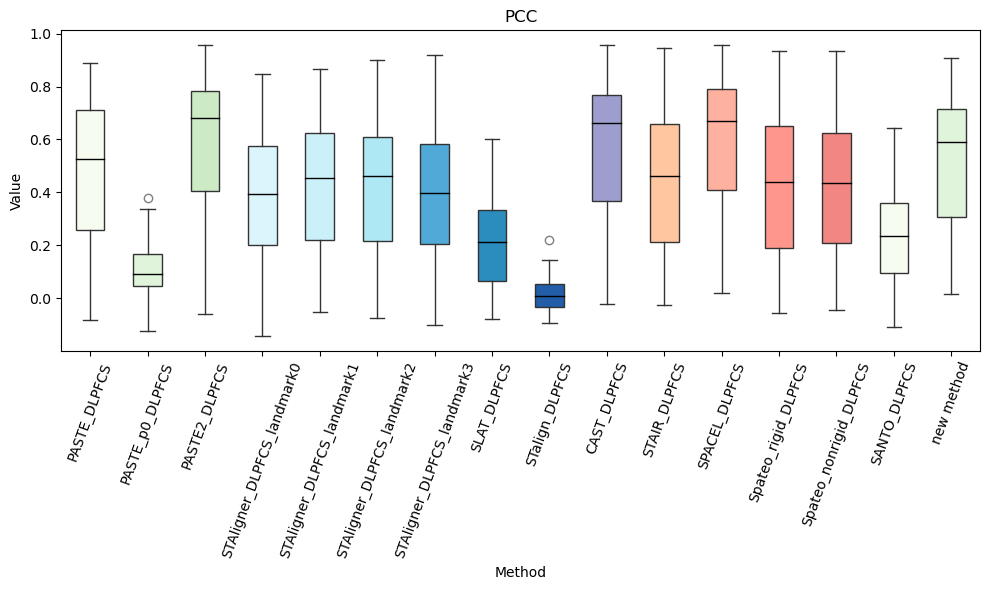

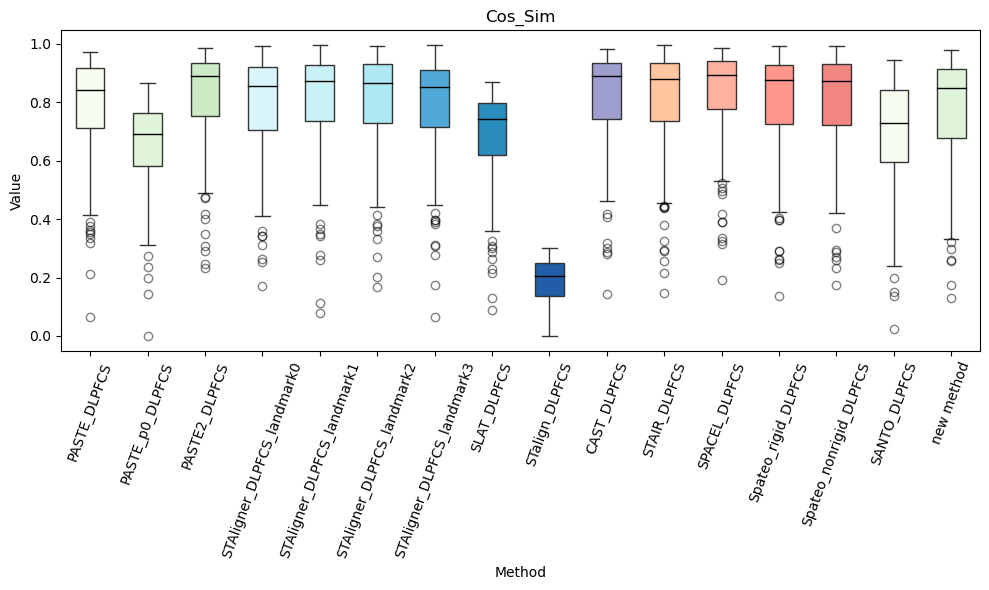

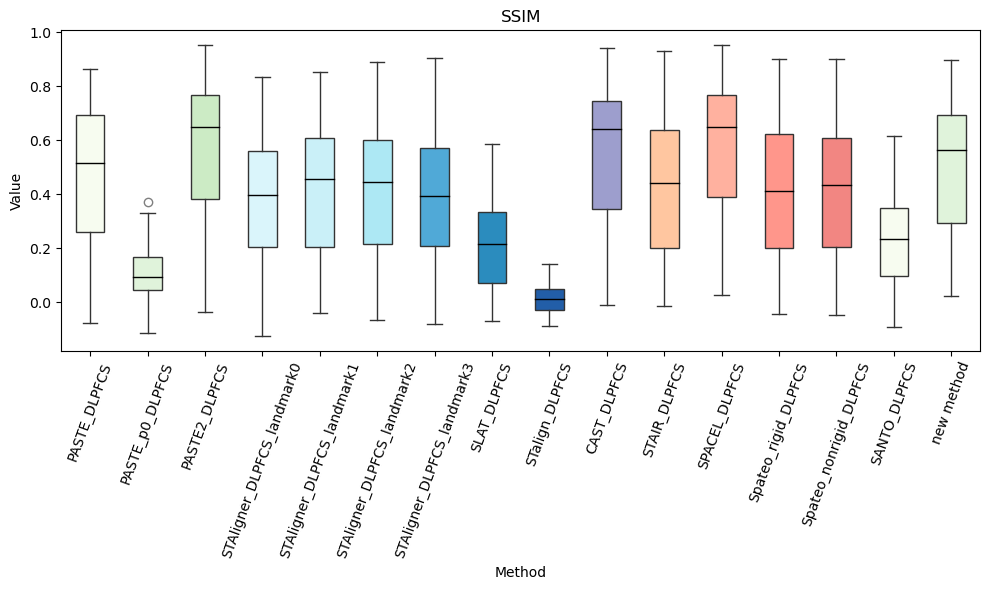

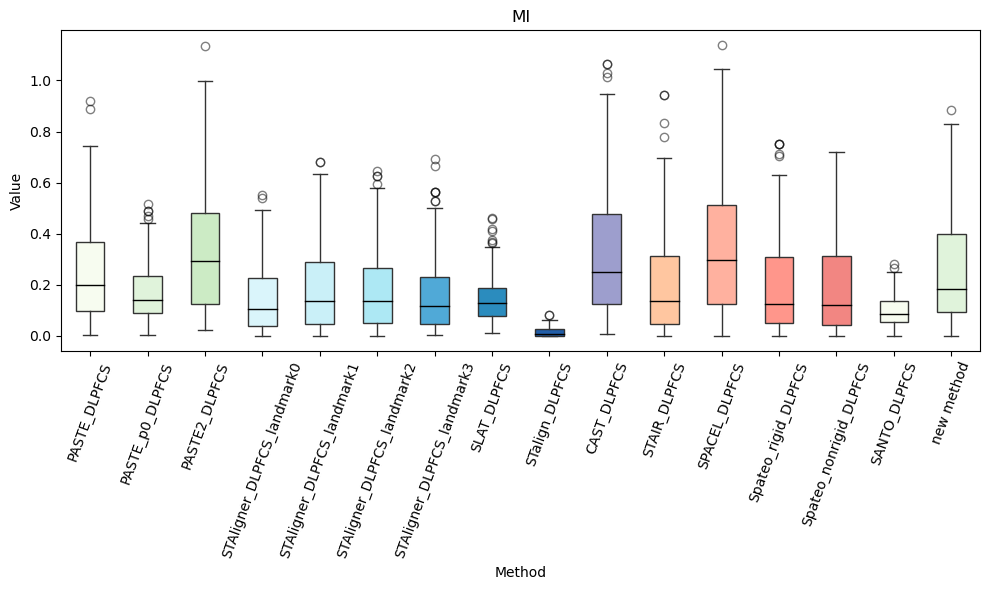

In [6]:
def Custom_boxplot(data, labels, colors=None, 
                   title='Boxplot', xlabel='Method', ylabel='Values'):
    if colors is None:
        colors = ['#f7fcf0','#e0f3db','#ccebc5','#daf5fbff','#caf0f8ff','#ade8f4ff','#50a9d7','#2b8cbe','#225ea8','#9D9ECD','#ffc6a0','#ffb19f','#ff968b','#f28682']
    colors = (colors * ((len(data) // len(colors)) + 1))[:len(data)]

    plt.figure(figsize=(10, 6))
    bp = plt.boxplot(data, patch_artist=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('#333333')
        patch.set_linewidth(1)

    for median in bp['medians']:
        median.set(color='black', linewidth=1)

    for whisker in bp['whiskers']:
        whisker.set(color='#333333', linewidth=1)
    for cap in bp['caps']:
        cap.set(color='#333333', linewidth=1)

    for flier in bp['fliers']:
        flier.set(marker='o', color='#333333', alpha=0.5)

    plt.xticks(range(1, len(labels) + 1), labels, rotation=70)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()


csv_files = [
    "Tutorial/Methods_Results_DLPFC/DLPFCS_GeneBased_PCC.csv",
    "Tutorial/Methods_Results_DLPFC/DLPFCS_GeneBased_Cos_Sim.csv",
    "Tutorial/Methods_Results_DLPFC/DLPFCS_GeneBased_SSIM.csv",
    "Tutorial/Methods_Results_DLPFC/DLPFCS_GeneBased_MI.csv"
]

new_method_lists = [
    pcc_values ,
    cos_sim_values,
    ssim_values,
    MI_values
]

plot_titles = [
    "PCC",
    "Cos_Sim",
    "SSIM",
    "MI"
]

for i in range(4):
    csv_path = csv_files[i]
    add_list = new_method_lists[i]
    title = plot_titles[i]

    df = pd.read_csv(csv_path, index_col=0)
    data_list = df.values.tolist()
    data_list.append(add_list)

    labels = df.index.tolist() + ["new method"]

    # plot
    Custom_boxplot(
        data=data_list,
        labels=labels,
        title=title,
        xlabel="Method",
        ylabel="Value"
    )


## Step 3: Calculate landmark-based metrics

### Calculate landmark-based metrics

For the ROI overlap metrics, you need to specify which regions to calculate the metrics for. For accuracy, it is calculated by default based on adata.obs['Region'].

In [ ]:
# ROI
region = ['WM', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6']
landmark_results = {}

for r in region:
    result = SABench.Average_ROI_Overlap(DLPFC_results, r)
    landmark_results[f"Average_ROI_Overlap_{r}"] = result

# Accuracy
accuracy = SABench.Average_Accuracy(DLPFC_results)
landmark_results["Average_Accuracy"] = accuracy

# check
for k, v in landmark_results.items():
    print(k, ":", v)

Average_ROI_Overlap_WM : 0.7302734867472861
Average_ROI_Overlap_Layer2 : 0.13983465143505638
Average_ROI_Overlap_Layer3 : 0.5929270063803802
Average_ROI_Overlap_Layer4 : 0.23313030924535383
Average_ROI_Overlap_Layer5 : 0.6227498283666536
Average_ROI_Overlap_Layer6 : 0.6312084020903511
Average_Accuracy : 0.7585041490444177


### Compare your results with other methods.

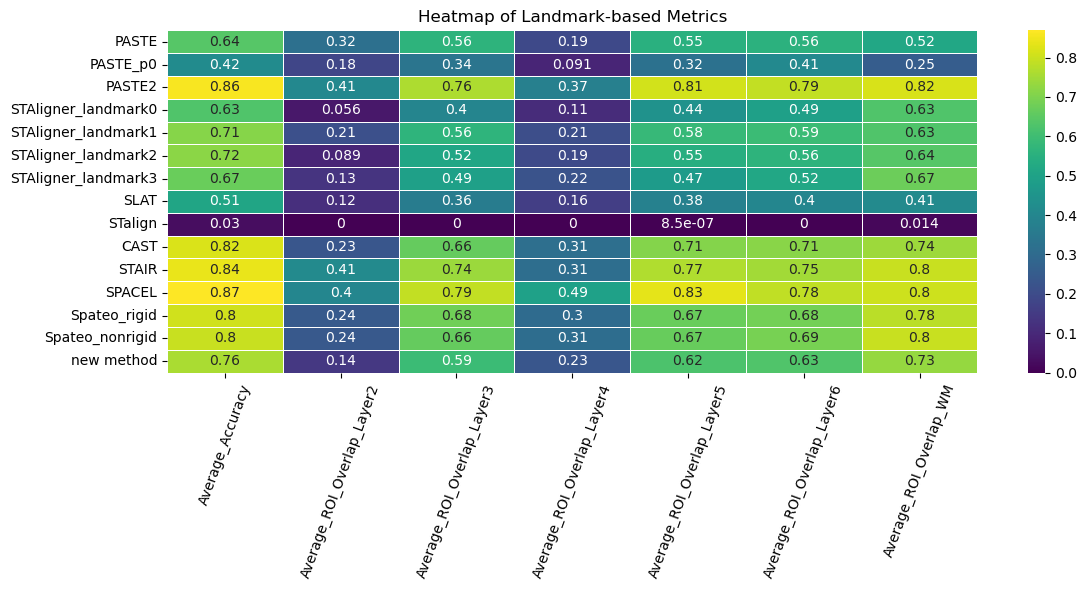

In [ ]:
df = pd.read_csv("Tutorial/Methods_Results_DLPFC/DLPFCS_LandmarkBased_Heatmap_PlotFig.csv", index_col=0)  
landmark_df = pd.DataFrame([landmark_results], index=["new method"])
df_combined = pd.concat([df, landmark_df], axis=0)


plt.figure(figsize=(12, 6))
ax = sns.heatmap(df_combined, annot=True, cmap='viridis', linewidths=0.5)

plt.xticks(rotation=70)
plt.title('Heatmap of Landmark-based Metrics')
plt.tight_layout()
plt.show()
